In [1]:
import numpy as np
import matplotlib.pylab as plt
import sgd
from model import EmbeddingModel


In [2]:
vocabulary, titles, texts = sgd.scan_text('posts_1.csv', 5)

In [3]:
len(titles)

406

In [4]:
#stratify sample on validation and train set
ratio = 0.8
middle = int(len(titles) * ratio)
train_titles, val_titles = titles[:middle], titles[middle:]
train_texts, val_texts = texts[:middle], texts[middle:]

In [5]:
middle

324

In [6]:
[list(vocabulary.keys())[list(vocabulary.values())[idx]] for idx in train_titles[6]]

['мобильный',
 'аудитория',
 'сервис',
 'google',
 'UNKNOWN',
 'россия',
 'расти',
 'UNKNOWN',
 'фон',
 'противоречивый',
 'репутация',
 'компания']

In [7]:
len(list(vocabulary.keys())[list(vocabulary.values())[14]])

4

In [8]:
val_titles = [title for title, text in zip(val_titles, val_texts) if len(text) != 0 and len(title) != 0]
val_texts = [text for title, text in zip(val_titles, val_texts) if len(text) != 0 and len(title) != 0]

In [9]:
train_titles = [title for title, text in zip(train_titles, train_texts) if len(text) != 0 and len(title) != 0]
train_texts = [text for title, text in zip(train_titles, train_texts) if len(text) != 0 and len(title) != 0]

In [11]:
model = EmbeddingModel(vocabulary)
model.train(train_titles, train_texts, val_titles, val_texts, number_of_epoch = 150)



In [12]:
model.mtx_embed

array([[ 0.0659648 ,  0.10760946,  0.11908105, ...,  0.03827015,
        -0.13138506, -0.00634068],
       [-0.15617067,  0.01566953,  0.03083333, ...,  0.07664893,
         0.12559105, -0.08141799],
       [-0.04961549, -0.01610386,  0.02984487, ...,  0.07237168,
         0.07598654, -0.0348956 ],
       ...,
       [ 0.00351127, -0.00726559, -0.0011369 , ...,  0.00590349,
        -0.01014589, -0.01250085],
       [ 0.00491042, -0.00886268,  0.00425948, ..., -0.00245607,
        -0.0224019 , -0.00932198],
       [-0.00620622, -0.0096824 ,  0.00644871, ..., -0.0062904 ,
         0.00275922,  0.00950189]], dtype=float32)

In [13]:
model.losses

[1.000057208339772,
 0.9956498231942472,
 0.9868602818455826,
 0.9760294346784034,
 0.9640406389304156,
 0.9478186217182676,
 0.9251174730737582,
 0.9130931835031351,
 0.8983873797160131,
 0.8828615506288047,
 0.8501342631767916,
 0.8220993780976766,
 0.8214430097222649,
 0.806011501886285,
 0.773203889743182,
 0.7494447206251228,
 0.7531763294069629,
 0.7162657558475748,
 0.7157088637961905,
 0.7033277777747955,
 0.7072711554186448,
 0.6760814439594639,
 0.6940045967323092,
 0.6202100288478646,
 0.6177505947895686,
 0.5951073943154296,
 0.6021190991453278,
 0.5996360796009681,
 0.5965510447894986,
 0.5579645779180509,
 0.5547897734869812,
 0.557453902921298,
 0.530228840763145,
 0.5579370781732289,
 0.497308441266954,
 0.5140293280735774,
 0.5339289073165656,
 0.5109471376632451,
 0.5064918769858365,
 0.486701582477107,
 0.5220695809430084,
 0.4813969390620825,
 0.48595106618580847,
 0.45769317619074484,
 0.4540333537795575,
 0.4756455976600608,
 0.38697293836354807,
 0.43754904149341

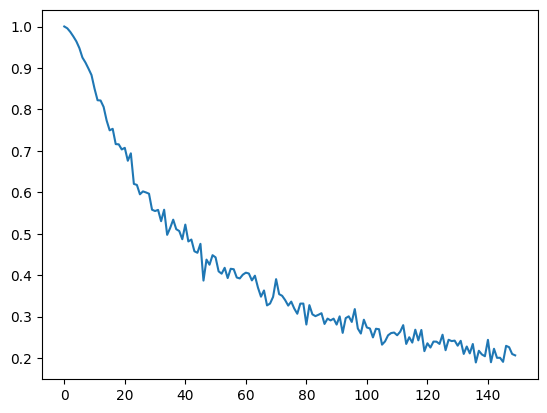

In [14]:
plt.plot(model.losses)
plt.show()

In [15]:
model.calculate_metric(val_titles, val_texts)

0.2682926829268293

In [ ]:
val_titles[9]

[744, 149, 12560, 5527]

In [17]:
mtx_embed = model.mtx_embed
#norms = mtx_embed.sum(axis=1, keepdims=True)
#mtx_embed = mtx_embed/norms
#mtx_embed = mtx_embed[1:]

In [18]:
res = np.dot(mtx_embed, mtx_embed.T)

In [19]:
res_mtx = np.argsort(res, axis=1)

In [20]:
for idx, row in enumerate(res_mtx[:10]):
    print("The word: " + list(vocabulary.keys())[list(vocabulary.values())[idx]])
    print("similar words: " + " ".join([list(vocabulary.keys())[list(vocabulary.values())[item]] for item in row[-10:]]))

The word: UNKNOWN
similar words: одному допустимый оперировать широко начинаться схема постараться дольше получаться теоретически
The word: обнаружение
similar words: указывать проверка клиентский аргумент name запрос true папка указать http
The word: атака
similar words: регистрация true клиентский криптографический умолчание запрос папка протокол указать http
The word: active
similar words: указывать аргумент json клиентский указать запрос name true папка http
The word: directory
similar words: сущность аргумент json клиентский name true запрос указать папка http
The word: помощь
similar words: строка передаваться переменный false рассмотреть аргумент папка указать http true
The word: azure
similar words: указывать имя аргумент name клиентский запрос true папка указать http
The word: следующий
similar words: true аргумент перевод false синтаксис переменный содержать передаваться рассмотреть указать
The word: год
similar words: комплект колоссальный купить рынок продать деньга цена до

In [25]:
vocabulary

{'UNKNOWN': 0,
 'обнаружение': 1,
 'атака': 2,
 'active': 3,
 'directory': 4,
 'помощь': 5,
 'azure': 6,
 'следующий': 7,
 'год': 8,
 'будет': 9,
 'момент': 10,
 'создание': 11,
 'служба': 12,
 'каталог': 13,
 'этот': 14,
 'время': 15,
 'функционал': 16,
 'протокол': 17,
 'различный': 18,
 'клиент': 19,
 'необходимость': 20,
 'поддерживать': 21,
 'совместимость': 22,
 'ряд': 23,
 'устареть': 24,
 'иметь': 25,
 'настройка': 26,
 'поумолчанию': 27,
 'ориентировать': 28,
 'администратор': 29,
 'часто': 30,
 'менять': 31,
 'это': 32,
 'создавать': 33,
 'большой': 34,
 'риск': 35,
 'статья': 36,
 'рассмотреть': 37,
 'которые': 38,
 'мочь': 39,
 'привести': 40,
 'domain': 41,
 'общий': 42,
 'между': 43,
 'март': 44,
 'был': 45,
 'выпустить': 46,
 'сервис': 47,
 'advanced': 48,
 'который': 49,
 'являться': 50,
 'облачный': 51,
 'аналог': 52,
 'локальный': 53,
 'продукт': 54,
 'analytics': 55,
 'отличие': 56,
 'версия': 57,
 'искусственный': 58,
 'ограничение': 59,
 'для': 60,
 'машинный': 61,

In [26]:
print("similar words: " + " ".join([list(vocabulary.keys())[list(vocabulary.values())[item]] for item in res_mtx[997][-10:]]))

similar words: удобство api содержать скобка синтаксис передаваться ситуация тело перевод указать
